### Factors Driving Life Expectancy : Do immunization matters?

### libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
#MICE performe multiple regression for imputing / it is a very robost model for imputation
from fancyimpute import IterativeImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression


import os

from library.sb_utils import save_file

In [2]:
sns.set()
sns.set_context("notebook")

### Importing Data

In [3]:
df1 = pd.read_csv("../data/life_exp_clean.csv")

In [4]:
# convert Year to datetime object 
df1.Year = pd.to_datetime(df1.Year, format='%Y-%d-%m')
df1['year']=df1['Year'].dt.year

In [5]:
df1.head(2)

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Diphtheria,HIV/AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,year,population
0,Afghanistan,2015-01-01,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,2015,17.334091
1,Afghanistan,2014-01-01,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,2014,12.699494


### Label Encoder categerical variable

In [6]:
# copy the data
df = df1.copy(deep=True)

In [7]:
df = df.drop(columns='Country')

In [8]:
# one hot_encoder
df = pd.get_dummies(df)
df.insert(0,'Country', df1['Country'], allow_duplicates=True)

In [9]:
df.head(2)

,Country,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,...,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,year,population,Status_Developed,Status_Developing
0,Afghanistan,2015-01-01,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,...,584.259210,33736494.0,17.2,17.3,0.479,10.1,2015,17.334091,0,1
1,Afghanistan,2014-01-01,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,...,612.696514,327582.0,17.5,17.5,0.476,10.0,2014,12.699494,0,1


In [10]:
#df = df.drop(columns=['Country','Year', 'year'])

### Visualizing High Dimensional Data

In [11]:
columns = ['Country', 'Year', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness__1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling',
       'year', 'Status_Developed', 'Status_Developing']
# define X and y
X = df[columns]
y = df[['Life_expectancy']]

In [12]:
# split the dataset     
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

In [13]:
# save name
names_list = ['Country','Year', 'year']
names_train = X_train[names_list]
names_test = X_test[names_list]
X_train.drop(columns=names_list, inplace=True)
X_test.drop(columns=names_list, inplace=True)
X_train.shape, X_test.shape

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


((2342, 20), (586, 20))

In [14]:
X_train.head()

,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,Status_Developed,Status_Developing
2357,188.0,NaN,1.10,29.520799,9.0,NaN,46.4,NaN,94.0,7.47,9.0,0.1,1272.448250,52779.0,1.2,1.2,0.492,9.3,0,1
2167,149.0,NaN,12.09,NaN,96.0,NaN,42.2,NaN,96.0,7.43,96.0,0.1,NaN,NaN,4.3,4.4,0.710,12.6,0,1
2,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
1838,82.0,1.0,9.95,3054.515582,NaN,NaN,52.6,1.0,97.0,7.79,97.0,0.1,26584.121690,164618.0,1.1,1.1,0.878,16.7,1,0
1137,149.0,3.0,2.87,345.377634,97.0,NaN,5.2,4.0,97.0,8.72,97.0,0.3,2242.711912,889216.0,2.1,2.1,0.618,11.4,0,1


In [15]:
# traitement of missing data with MICE Imputation 
#(we use mice imputation because it was the best imputation found in phase one of the project - Data wrangling)
mice_imputer = IterativeImputer()
X_train_imput = mice_imputer.fit_transform(X_train)

In [16]:
# scale the date
scaler = StandardScaler()
X_train_imput_scale = scaler.fit_transform(X_train_imput)

In [17]:
# dimentionnality reduction
pca = PCA()
X_train_pca = pca.fit(X_train_imput_scale)

In [18]:
X_train_pcat = pca.transform(X_train_imput_scale)

#Pipiline not working ?????
mice_imputer = IterativeImputer()
scaler = StandardScaler()
pca = PCA()
#selectkbest= SelectKBest(f_regression, k=15)
#Define the pipeline: pipeline ---#step = {'MICE Imputation': mice_imputer, 
pipeline = make_pipeline(mice_imputer, scaler, pca)

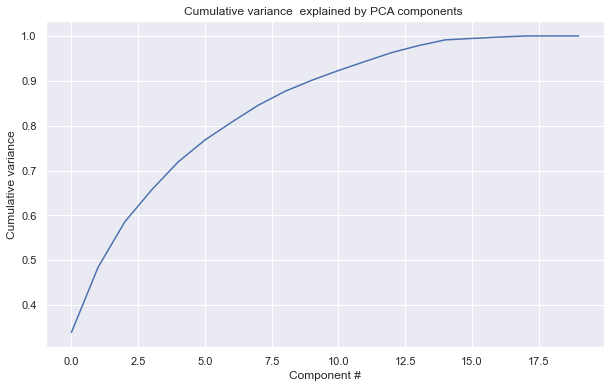

In [19]:
# line plot to visualize the cumulative explained variance  with number of components
plt.subplots(figsize=(10, 6))
plt.plot(X_train_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative variance')
plt.title('Cumulative variance  explained by PCA components ');

Note: 
The first five components seem to account for over 75% of the variance, with the first 10 components it is about 92% of the variance

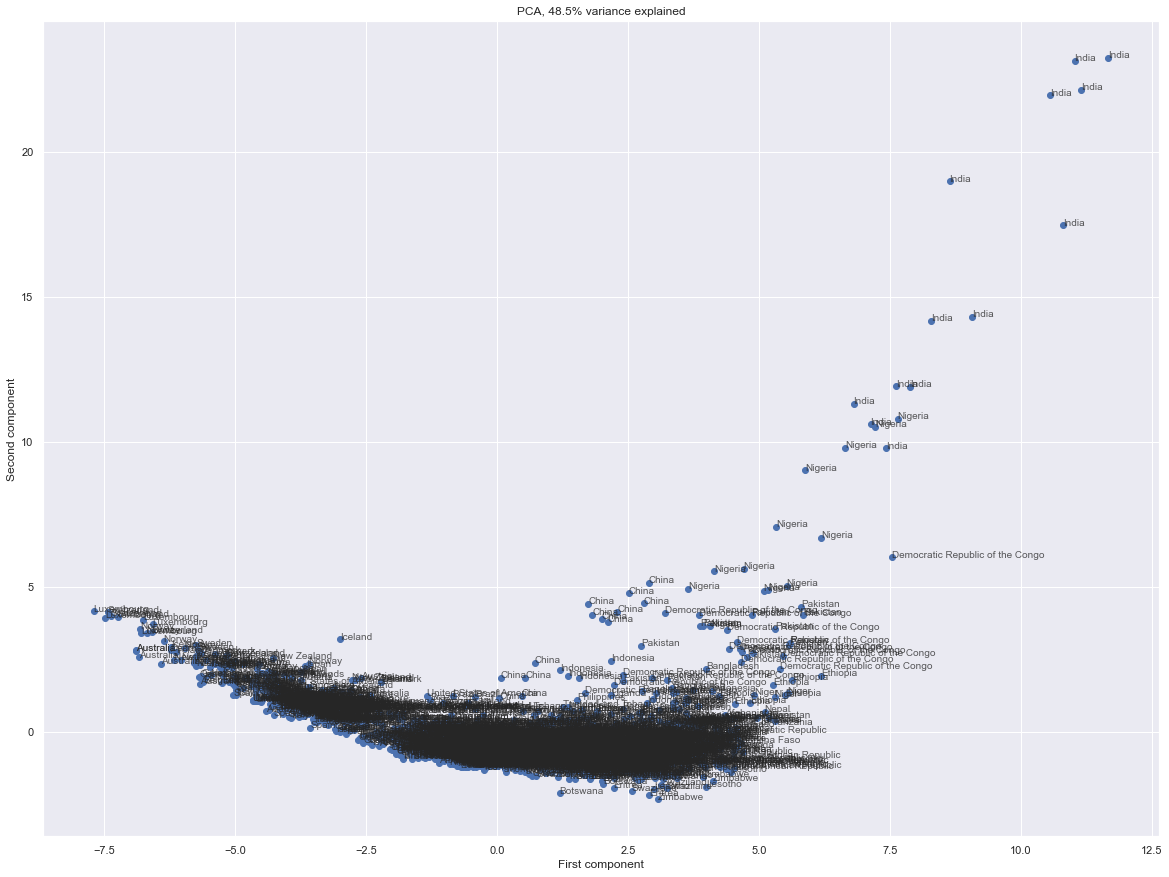

In [20]:
x = X_train_pcat[:, 0]
y = X_train_pcat[:, 1]
ctry = names_train['Country']
pc_var = 100 * X_train_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(20,15))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(ctry, x, y):
    plt.annotate(s, (x, y), fontsize=10, alpha=0.75)

Text(0.5, 1.0, 'PCA, 48.5% variance explained')

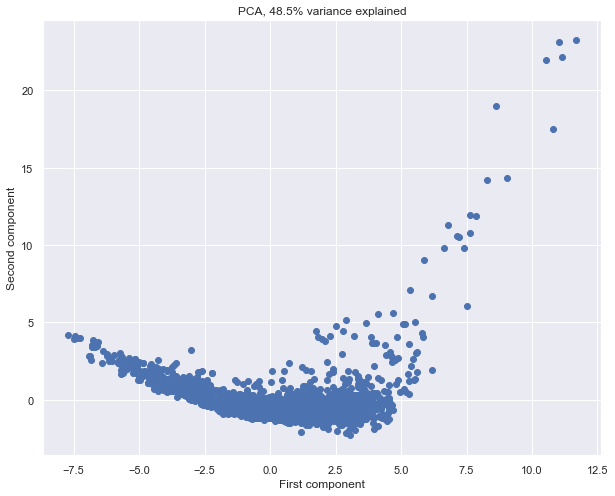

In [21]:
x = X_train_pcat[:, 0]
y = X_train_pcat[:, 1]
ctry = names_train['Country']
pc_var = 100 * X_train_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'PCA, {pc_var:.1f}% variance explained')

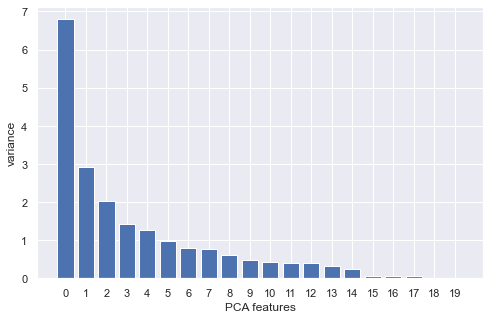

In [22]:
# Plot the explained variances
features = range(X_train_pca.n_components_)
plt.figure(figsize=(8,5))
plt.bar(features, X_train_pca.explained_variance_)
plt.xlabel('PCA features')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

Note: 

### Data quantity assessment

In [32]:
# define the pipeline wiht simple linear regression 
pipe = make_pipeline(
    IterativeImputer(), 
    StandardScaler(),
    PCA(n_components=19),
    LinearRegression()
)

In [33]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


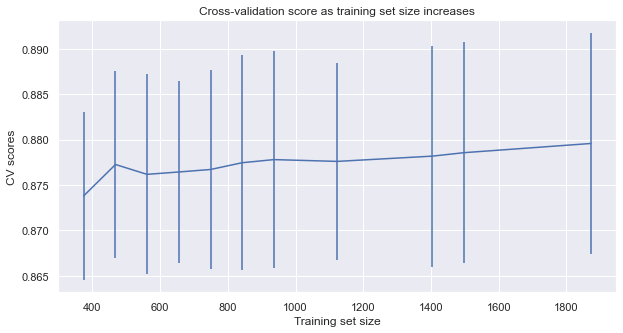

In [34]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');

Note: Note: note this figure  shows that, the dataset is sufficient. the CV_score remain more or less stable after a fraction 75% of data used for training set and 25 % for Test set.

?????

### Drop all the null value in the dataset and assess the data quantity

In [35]:
dfno_nan = df.dropna()

In [42]:
columns = ['Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness__1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling',
       'year', 'Status_Developed', 'Status_Developing']
# define X and y
X = dfno_nan[columns]
y = dfno_nan[['Life_expectancy']]

In [43]:
# split the dataset     
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

In [44]:
# define the pipeline wiht simple linear regression 
pipe2 = make_pipeline(
    StandardScaler(),
    PCA(n_components=19),
    LinearRegression()
)

In [45]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(pipe2, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

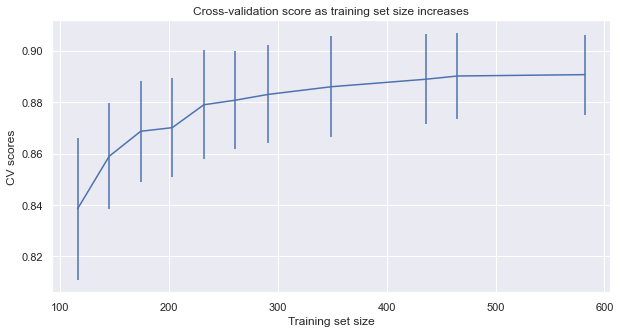

In [46]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');

Note: Here, we found that Cv_score increase, reduction of the standart deviation in CV_score, 
but it remains stable after the use of 75% dataset as training and 25% for test set. 

#### Save dataset

In [23]:
#data_Zero_NAN # Raw data -- replace 0 with NaN---- delete 10 row 
datapath = '../data'
save_file(df1, 'life_exp_clean.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "../data\life_exp_clean.csv"
